- (1) jurisdiction for disputes in a country different than consumer’s residence (\<j\>); 
- (2) choice of a foreign law governing the contract (\<law\>); 
- (3) limitation of liability (\<ltd\>); 
- (4) the provider’s right to unilaterally terminate the contract/access to the service (\<ter\>); 
- (5) the provider’s right to unilaterally modify the contract/the service (\<ch\>); 
- (6) requiring a consumer to undertake arbitration before the court proceedings can commence (\<a\>);
- (7) the provider retaining the right to unilaterally remove consumer content from the service, including in-app purchases (\<cr\>); 
- (8) having a consumer accept the agreement simply by using the service, not only without reading it, but even without having to click on “I agree/I accept” (\<use\>); 
- (9) the scope of consent granted to the ToS also takes in the privacy policy, which forms part of the “General Agreement” (\<pinc\>)

In [1]:
import re 
import os

from utils.dataset_utils import *
from utils.test import *
from datasets import Dataset, DatasetDict, load_dataset, load_from_disk

In [2]:
sentences_dir = "./corpus/sentences"
labels_dir = "./corpus/tags"
list_tags_file = "./corpus/lists/list_tags.txt"
doc_list_file = "./corpus/lists/LIST_142.txt"

In [3]:
doc_sentences = {}  # key = document name, value = list of sentences
labels = {}         # key = document name, value = list of tags for each sentence
doc_list = []       # List of documents by file name

tags_to_id, id_to_tags = get_tags_id(list_tags_file)

all_sentences, all_labels, all_documents, id2doc = get_senteces_labels(doc_list_file, sentences_dir, labels_dir, tags_to_id)

In [4]:
lex_dataset = load_dataset("lex_glue", "unfair_tos")

In [5]:
print(lex_dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 5532
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 1607
    })
    validation: Dataset({
        features: ['text', 'labels'],
        num_rows: 2275
    })
})


In [6]:
full_dataset, new_tags_to_id = get_full_dataset(all_sentences, all_labels, all_documents, aggregate_tags=True, id_to_tags=id_to_tags)
dataset_dict, train_docs, val_docs, test_docs = train_val_test_split(full_dataset)
print(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'doc'],
        num_rows: 23341
    })
    validation: Dataset({
        features: ['text', 'labels', 'doc'],
        num_rows: 10197
    })
    test: Dataset({
        features: ['text', 'labels', 'doc'],
        num_rows: 4357
    })
})


In [34]:
docs_correctly_distributed_among_splits(dataset_dict, n_test_docs=142)
check_label_integrity(dataset_dict, multi_class=False)

docs_correctly_distributed_among_splits OK (V)
check_label_integrity OK (V)


In [8]:
not_aggr_dataset, id_to_tags = get_full_dataset(all_sentences, all_labels, all_documents, aggregate_tags=False, id_to_tags=id_to_tags)
get_tags_frequencies(not_aggr_dataset, tags_to_id)

{'a1': 9,
 'a2': 85,
 'a3': 71,
 'ch1': 0,
 'ch2': 500,
 'ch3': 6,
 'cr1': 0,
 'cr2': 150,
 'cr3': 111,
 'j1': 38,
 'j2': 1,
 'j3': 179,
 'law1': 33,
 'law2': 191,
 'law3': 1,
 'ltd1': 101,
 'ltd2': 948,
 'ltd3': 23,
 'not_clause': 34674,
 'pinc1': 0,
 'pinc2': 115,
 'pinc3': 0,
 'ter1': 0,
 'ter2': 378,
 'ter3': 246,
 'use1': 0,
 'use2': 370,
 'use3': 0}

Train: {'fair': 21517, 'ltd': 559, 'ter': 364, 'ch': 311, 'use': 225, 'cr': 146, 'law': 120, 'j': 115, 'a': 103, 'pinc': 67}
Validation: {'fair': 9362, 'ltd': 269, 'ter': 191, 'ch': 130, 'use': 93, 'cr': 86, 'law': 49, 'j': 39, 'a': 37, 'pinc': 35}
Test: {'fair': 3967, 'ltd': 143, 'ter': 69, 'ch': 65, 'use': 52, 'cr': 29, 'j': 26, 'law': 23, 'a': 16, 'pinc': 13}


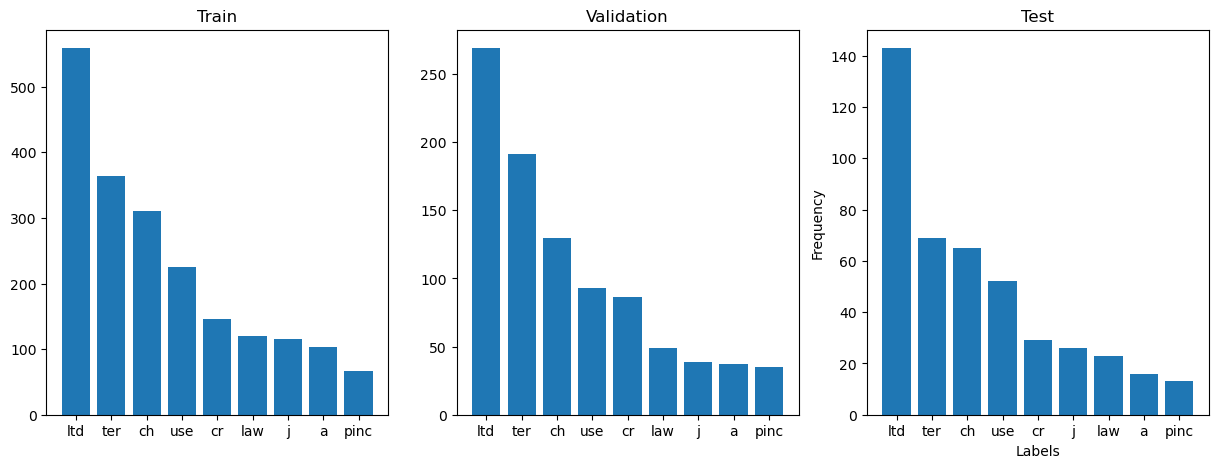

In [36]:
print_label_distribution(dataset_dict, new_tags_to_id)

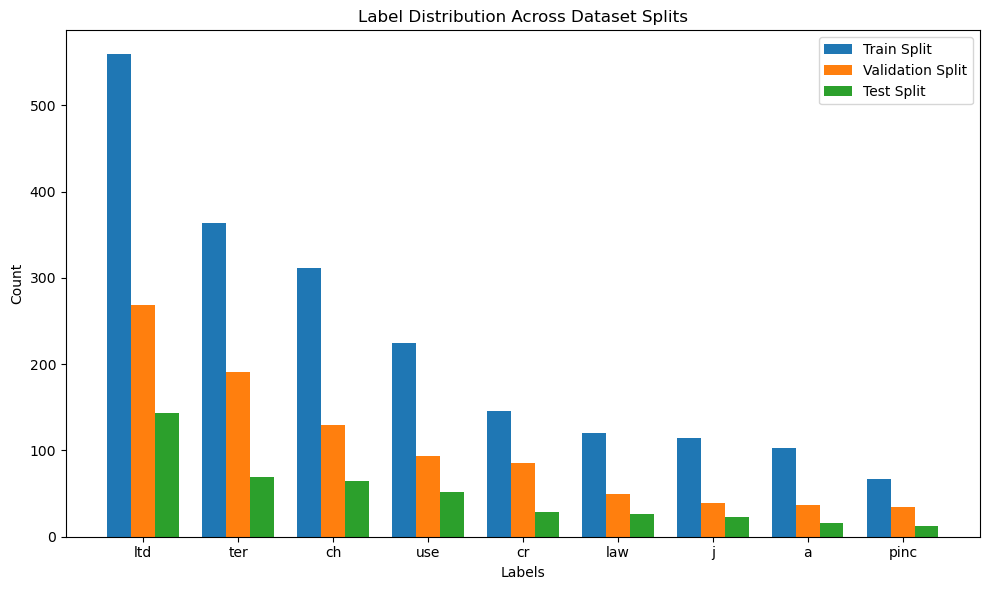

In [37]:
compare_dataset_splits(dataset_dict, new_tags_to_id)

In [38]:
# Mapping used by lex glue, they are different from the ones used in unfair_tos 
lex_map = {
    0: "ltd",
    1: "ter",
    2: "ch",
    3: "cr",
    4: "use",
    5: "law",
    6: "j",
    7: "a",
    8: "pinc",          # Not in original corpus
    9: "fair"           # Not in original corpus
}

In [39]:
train_freqs = get_tags_frequencies(dataset_dict, new_tags_to_id, "train")
data_train_val = [val for k, val in train_freqs.items() if k !="fair"]

In [40]:
train_freqs

{'fair': 21517,
 'ltd': 559,
 'ter': 364,
 'ch': 311,
 'use': 225,
 'cr': 146,
 'law': 120,
 'j': 115,
 'a': 103,
 'pinc': 67}

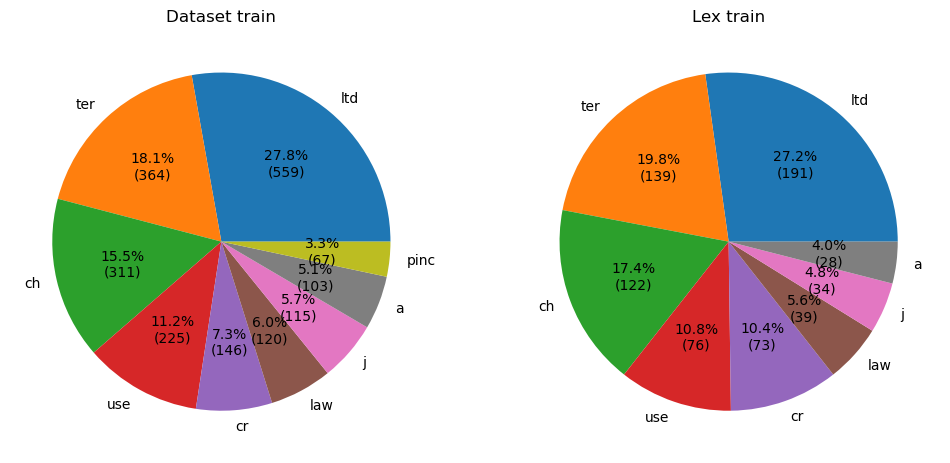

In [41]:
compare_lexglue(dataset_dict, lex_dataset, new_tags_to_id, lex_map, "train")

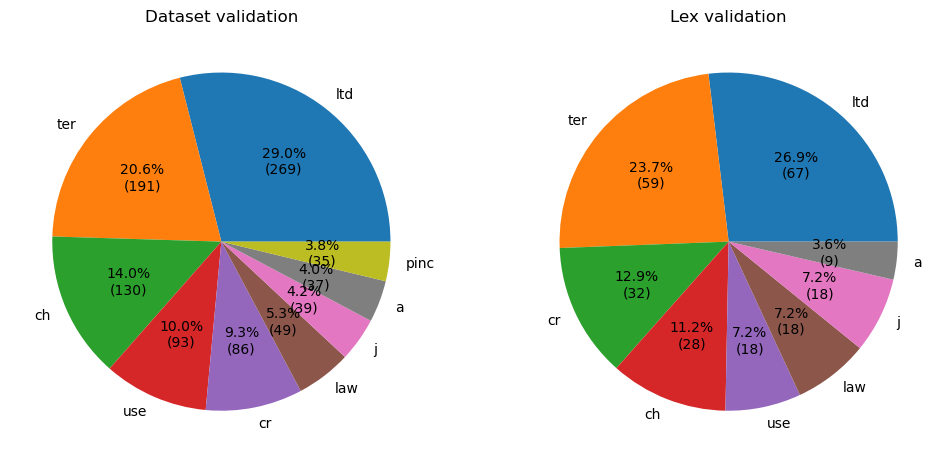

In [42]:
compare_lexglue(dataset_dict, lex_dataset, new_tags_to_id, lex_map, "validation")

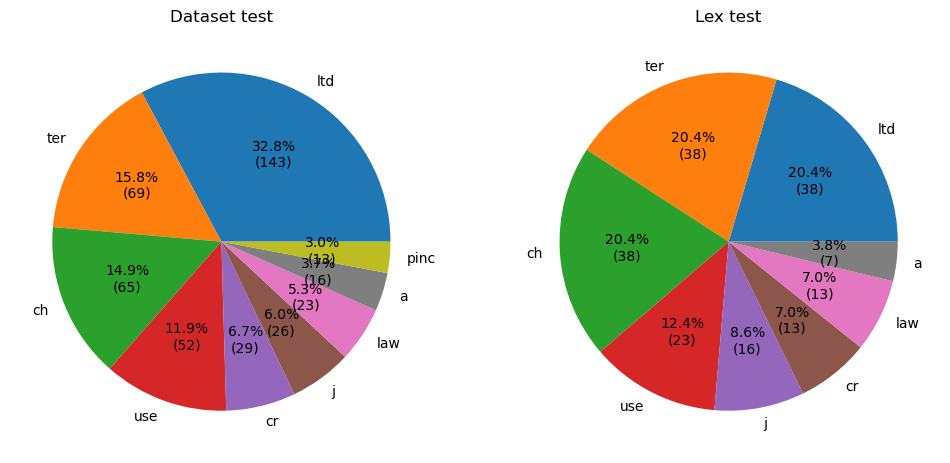

In [43]:
compare_lexglue(dataset_dict, lex_dataset, new_tags_to_id, lex_map, "test")

In [44]:
# Save to file
dataset_dict.save_to_disk("./142_dataset/tos.hf")
# how to load ---> load_from_disk("./142_dataset/tos.hf/")

Saving the dataset (0/1 shards):   0%|          | 0/23341 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10197 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/4357 [00:00<?, ? examples/s]